## importing required libraries :

In [242]:
import pandas as pd
import math
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### importing dataset

In [270]:
df = pd.read_csv('students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [43]:
df.shape

(1205, 14)

### Data visualisation

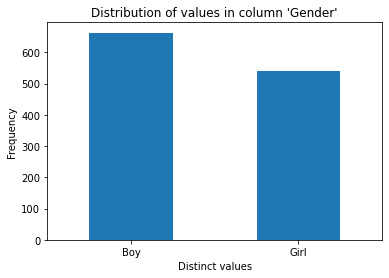

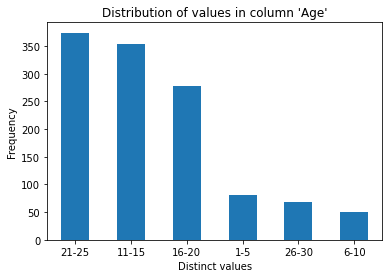

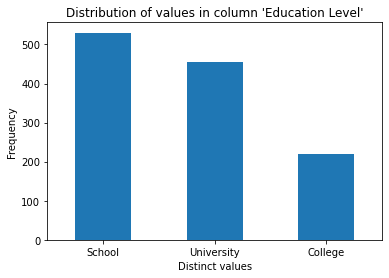

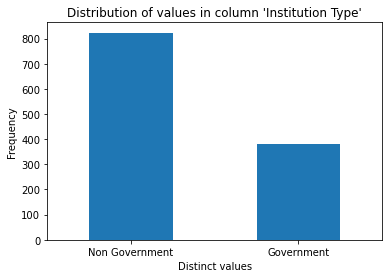

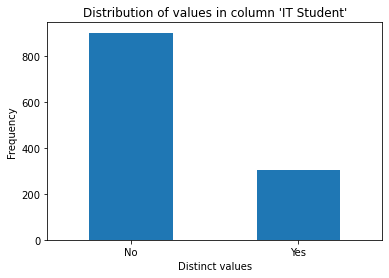

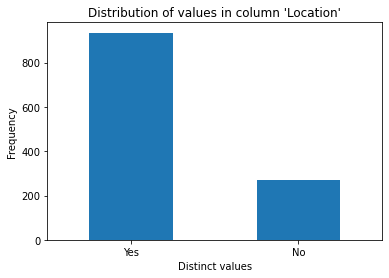

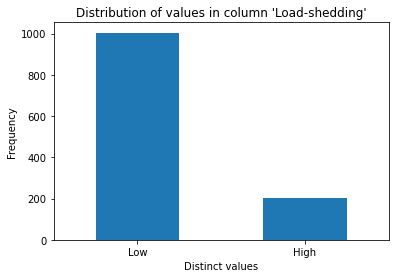

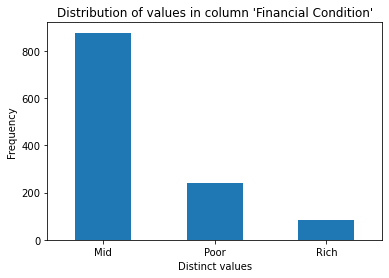

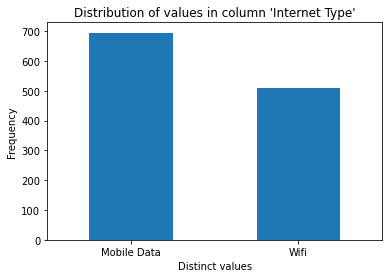

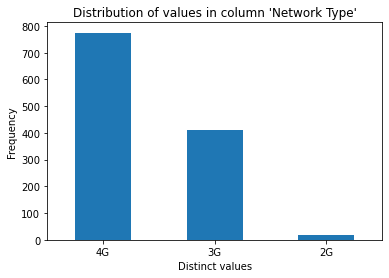

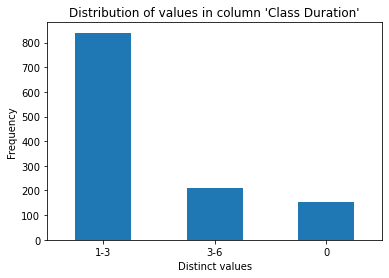

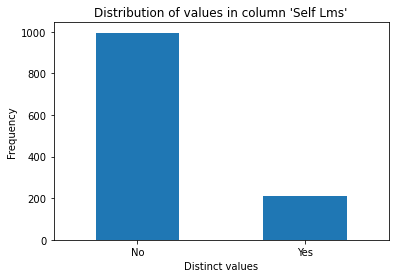

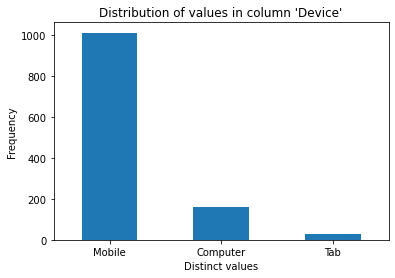

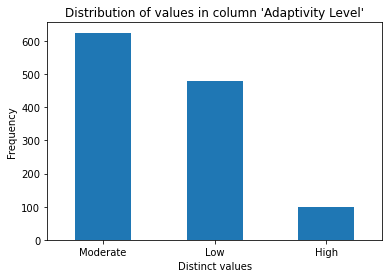

In [46]:
for column in df.columns:
    plt.figure()
    if pd.api.types.is_numeric_dtype(df[column]):
        # Numeric column
        df[column].hist()
        plt.title(f"Distribution of values in column '{column}'")
        plt.xlabel("Values")
        plt.ylabel("Frequency")
    else:
        # Categorical column
        value_counts = df[column].value_counts()
        value_counts.plot(kind='bar')
        plt.title(f"Distribution of values in column '{column}'")
        plt.xlabel("Distinct values")
        plt.ylabel("Frequency")
        plt.xticks(rotation=0)
    plt.show()

### Data transformation

In [272]:
df['Gender'] = df['Gender'].replace({'Boy': 1, 'Girl':0})
df['Education Level']=df['Education Level'].replace({'School':0,'College':1,'University':2})
df['Institution Type']=df['Institution Type'].replace({'Non Government':0,'Government':1})
df['IT Student'] = df['IT Student'].replace({'Yes': 1, 'No':0})
df['Location'] = df['Location'].replace({'Yes': 1, 'No':0})
df['Load-shedding'] = df['Load-shedding'].replace({'High': 1, 'Low':0})
df['Financial Condition']=df['Financial Condition'].replace({'Poor':0,'Mid':1,'Rich':2})
df['Internet Type']=df['Internet Type'].replace({'Wifi':0,'Mobile Data':1})
df['Network Type']=df['Network Type'].replace({'2G':0,'3G':1,'4G':2})
df['Self Lms'] = df['Self Lms'].replace({'Yes': 1, 'No':0})
df['Device']=df['Device'].replace({'Tab':0,'Mobile':1,'Computer':2})
df['Adaptivity Level']=df['Adaptivity Level'].replace({'Low':0,'Moderate':1,'High':2})

In [273]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,21-25,2,0,0,1,0,1,0,2,3-6,0,0,1
1,0,21-25,2,0,0,1,1,1,1,2,1-3,1,1,1
2,0,16-20,1,1,0,1,0,1,0,2,1-3,0,1,1
3,0,11-15,0,0,0,1,0,1,1,2,1-3,0,1,1
4,0,16-20,0,0,0,1,0,0,1,1,0,0,1,0


In [274]:
df.corr()

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level
Gender,1.000000,0.136257,0.106910,0.233284,0.034231,0.059998,0.031032,-0.021589,0.032527,0.138331,0.140691,0.094695
Education Level,0.136257,1.000000,0.155049,0.505306,-0.208581,0.210506,0.058994,-0.281628,0.057889,0.455465,0.273354,-0.024308
Institution Type,0.106910,0.155049,1.000000,-0.104185,-0.326813,-0.017794,0.069911,0.060198,0.060035,-0.096722,-0.096857,-0.269948
IT Student,0.233284,0.505306,-0.104185,1.000000,0.009697,0.186005,0.070494,-0.113452,-0.128817,0.453429,0.386776,0.123269
Location,0.034231,-0.208581,-0.326813,0.009697,1.000000,-0.245380,0.109784,-0.222660,0.171539,-0.036443,0.070397,0.250746
Load-shedding,0.059998,0.210506,-0.017794,0.186005,-0.245380,1.000000,-0.188949,-0.013199,-0.164678,0.187610,0.052088,-0.085063
Financial Condition,0.031032,0.058994,0.069911,0.070494,0.109784,-0.188949,1.000000,-0.284559,0.193258,-0.011446,0.086581,0.238270
Internet Type,-0.021589,-0.281628,0.060198,-0.113452,-0.222660,-0.013199,-0.284559,1.000000,-0.335989,-0.084661,-0.250007,-0.089234
Network Type,0.032527,0.057889,0.060035,-0.128817,0.171539,-0.164678,0.193258,-0.335989,1.000000,-0.207056,0.063738,0.141849
Self Lms,0.138331,0.455465,-0.096722,0.453429,-0.036443,0.187610,-0.011446,-0.084661,-0.207056,1.000000,0.210852,0.156557


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   int64 
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   int64 
 3   Institution Type     1205 non-null   int64 
 4   IT Student           1205 non-null   int64 
 5   Location             1205 non-null   int64 
 6   Load-shedding        1205 non-null   int64 
 7   Financial Condition  1205 non-null   int64 
 8   Internet Type        1205 non-null   int64 
 9   Network Type         1205 non-null   int64 
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   int64 
 12  Device               1205 non-null   int64 
 13  Adaptivity Level     1205 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 131.9+ KB


In [276]:
df.describe()

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,0.550207,0.938589,0.317012,0.252282,0.775934,0.166805,0.869710,0.576763,1.627386,0.174274,1.109544,0.684647
std,0.497679,0.902863,0.465506,0.434503,0.417139,0.372956,0.504584,0.494277,0.515295,0.379502,0.384003,0.618221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000


### Implementing the machine learing model

In [285]:
x = df[['Financial Condition','Self Lms','Network Type','IT Student','Device']]
y = df['Adaptivity Level']

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (903, 5)
X_test: (302, 5)
y_train: (903,)
y_test: (302,)


### Linear Regression

In [288]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [289]:
regr_pred = np.floor(regr.predict(X_test)).astype(int)
accuracy_score(y_test,regr_pred)

0.4205298013245033

### Random Forest Regression

In [234]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth = 10,random_state = 5,n_estimators = 10)
rfr.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=10, random_state=5)

In [243]:
rfr_pred = np.floor(rfr.predict(X_test)).astype(int)
accuracy_score(y_test,rfr_pred)

0.4735099337748344

### Suport Vector Regression

In [244]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)


SVR()

In [246]:
svm_pred = np.floor(svm.predict(X_test)).astype(int)
accuracy_score(y_test,svm_pred)

0.45695364238410596

### Decision Tree Regression

In [263]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [264]:
dtr_pred = np.floor(dtr.predict(X_test)).astype(int)
accuracy_score(y_test,dtr_pred)

0.4867549668874172

### XGboost Regression

In [265]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [266]:
xgb_pred = np.floor(xgb.predict(X_test)).astype(int)
accuracy_score(y_test,xgb_pred)

0.4602649006622517

### GradientBoostingRegressor

In [290]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

## Conclusion :

### Comparing other machine Learing Algorithms Decision Tree Regression performs well with Accuracy Score 48.67%